# Ott Antonsen reduction

In [6]:
import jax; jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import vmap, random
from jaxkuramoto import theory, Kuramoto, odeint
from jaxkuramoto.solver import runge_kutta
from jaxkuramoto.distribution import Cauchy

import matplotlib.pyplot as plt

In [4]:
# number of oscillators
n_oscillator = 10**4
# define natural frequencies
loc, gamma = 0.0, 1.0
seed = 0
dist = Cauchy(loc=loc, gamma=gamma)
omegas = dist.sample(key=random.PRNGKey(seed), shape=(n_oscillator,))
# define coupling strengths
K = 3.0

In [8]:
model = Kuramoto(omegas, K)
# define initial conditions
init_thetas = random.uniform(key=random.PRNGKey(seed), shape=(n_oscillator,)) * 2 * jnp.pi
# define time points
t0, t1 = 0.0, 50.0
dt = 0.01
# solve the Kuramoto model
sol_full = odeint(model.vector_fn, runge_kutta, t0, t1, dt, init_thetas, model.orderparameter)

In [15]:
model_oa = theory.OttAntonsen(dist, K)
# compute the Ott Antonsen solution
sol_oa = odeint(model_oa.vector_fn, runge_kutta, t0, t1, dt, 0.01*1j, model_oa.to_orderparam)

In [16]:
orderparam_theory = theory.orderparam(K, dist)

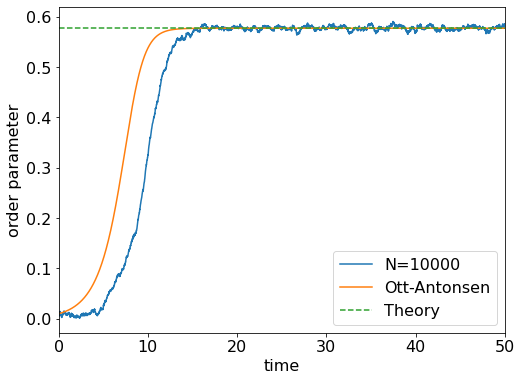

In [25]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 16})
plt.xlabel("time")
plt.ylabel("order parameter")
plt.xlim(t0, t1)
plt.plot(sol_full.ts, sol_full.observables, label=f"N={n_oscillator}")
plt.plot(sol_oa.ts, sol_oa.observables, label="Ott-Antonsen")
plt.plot([t0, t1], [orderparam_theory, orderparam_theory], label="Theory", ls="dashed")
plt.legend()